In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from collections import Counter
import openpyxl as xl
import scipy.stats as scp
import json

In [2]:
g = nx.read_gml("networks/mg_net.gml")
undirected_g = g.to_undirected()

In [3]:
gene_essentiality = {}
label = {"Y":True,"N":False,None:False}
wb = xl.load_workbook('mg_essentiality.xlsx', data_only=True)
sh=wb['Sheet1']
for i in range(1,sh.max_row):
    gene = sh['C'+str(i+1)].value
    essential = label[sh['H'+str(i+1)].value]
    gene_essentiality[gene] = essential    

In [4]:
print("total nodes:",len(g.nodes))
print("total edges:",len(g.edges))
print("molecules:",len([x for x,y in g.nodes(data=True) if y['type']=='m']))
print("reactions:",len([x for x,y in g.nodes(data=True) if y['type']=='r']))
print("Is connected:",nx.is_connected(undirected_g))
print("Number of components:",nx.number_connected_components(undirected_g))

total nodes: 119689
total edges: 480094
molecules: 37027
reactions: 82662
Is connected: True
Number of components: 1


In [5]:
tableau20 = ['#1f77b4','#aec7e8','#ff7f0e','#ffbb78','#2ca02c','#98df8a','#d62728','#ff9896','#9467bd','#c5b0d5','#8c564b','#c49c94','#e377c2','#f7b6d2','#7f7f7f','#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5']
node_colors = ["#0092ff","#fe3100"]
plt.style.use('ggplot')
plt.rc('text', usetex=True)

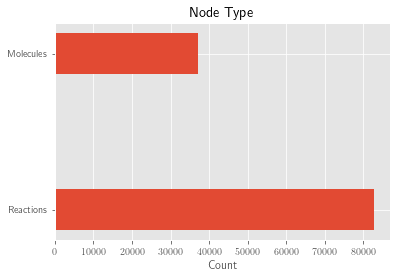

In [6]:
labels = ['Molecules', 'Reactions']

types = list(dict(g.nodes(data='type')).values())
sizes = [types.count('m'),types.count('r')]
y_pos = np.array(range(len(labels)))*3

fig, ax = plt.subplots()
#ax.set_xscale('log')
ax.barh(y_pos, sizes, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
plt.title('Node Type')
plt.show()

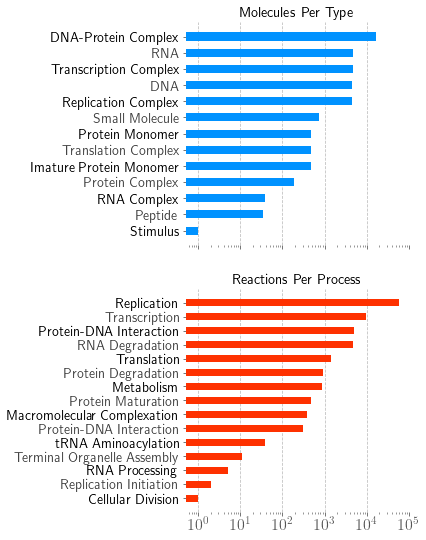

In [7]:




processes = [m['process'] for _,m in g.nodes.data() if m['type']=='r']
process_count = {}
process_count = Counter(processes)

#process_count["Replication Initiation"] = process_count["Process_ReplicationInitiation"]
#del process_count["Process_ReplicationInitiation"]

mol_types = [m['moltype'] for _,m in g.nodes.data() if m['type']=='m']
types_count = Counter(mol_types)


fontsize = 14

fig, axs = plt.subplots(2,1,figsize=(4,9),sharex=True)

types,sizes = zip(*{k: v for k, v in sorted(types_count.items(), key=lambda x: x[1],reverse = True)}.items())
y_pos = np.array(range(len(types)))*5

label_colors = ["black","#444444"]*int(len(types)/2)
if len(label_colors)<len(types):
    label_colors = label_colors+["black"]

axs[0].set_facecolor('none')
axs[0].set_xscale('log')
axs[0].barh(y_pos, sizes,2.5, align='center',color=node_colors[0],edgecolor='none')
axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(types,color="black",fontsize=fontsize)
for ticklabel, tickcolor in zip(axs[0].get_yticklabels(), label_colors):
    ticklabel.set_color(tickcolor)
axs[0].invert_yaxis()  # labels read top-to-bottom
#axs[0].set_xlabel('Number of molecules')
axs[0].grid(False)
axs[0].grid(axis="x",color='grey',linestyle='--',alpha=0.5)
axs[0].title.set_text('Molecules Per Type')
for spine in axs[0].spines.values():
    spine.set_edgecolor('none')

processes,sizes = zip(*{k: v for k, v in sorted(process_count.items(), key=lambda x: x[1],reverse = True)}.items())
y_pos = np.array(range(len(processes)))*5
label_colors = ["black","#444444"]*int(len(processes)/2)
if len(label_colors)<len(processes):
    label_colors = label_colors+["black"]
axs[1].set_facecolor('none')
axs[1].set_xscale('log')
axs[1].barh(y_pos, sizes,2.5, align='center',color=node_colors[1],edgecolor='none')
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(processes,fontsize=fontsize)
for ticklabel, tickcolor in zip(axs[1].get_yticklabels(), label_colors):
    ticklabel.set_color(tickcolor)
axs[1].invert_yaxis()  # labels read top-to-bottom
axs[1].grid(False)
axs[1].grid(axis="x",color='grey',linestyle='--',alpha=0.5)
axs[1].title.set_text('Reactions Per Process')
for spine in axs[1].spines.values():
    spine.set_edgecolor('none')
#ax.set_xlabel('Number of reactions')
#axs[2].title('Reactions Per Process')
#plt.tight_layout()
plt.savefig("node_distributions.png",dpi=500, bbox_inches = 'tight',transparent=True,edgecolor='none')

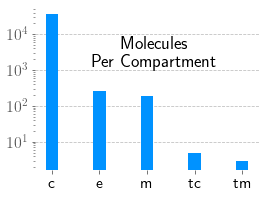

In [8]:
compartments = [m['compartment'] for _,m in g.nodes(data=True) if m['type']=='m']
compartment_count = Counter(compartments)

compartments,sizes = zip(*{k: v for k, v in sorted(compartment_count.items(), key=lambda x: x[1],reverse = True)}.items())

y_pos = np.array(range(len(compartments)))*3

fig, ax = plt.subplots(figsize=(4,3))
ax.set_yscale('log')
ax.bar(y_pos, sizes, align='center',color=node_colors[0],edgecolor='none')
ax.set_xticks(y_pos)
ax.set_xticklabels(compartments,color="black",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of molecules')
ax.set_facecolor('none')
for spine in ax.spines.values():
    spine.set_edgecolor('none')
ax.grid(False)
ax.grid(axis="y",color='grey',linestyle='--',alpha=0.5)
ax.text(ax.get_xlim()[1]/2,0.3e4,'Molecules\n Per Compartment',verticalalignment='center', horizontalalignment='center',
color="black", fontsize=18)
plt.savefig("location_distributions.png",dpi=500, bbox_inches = 'tight',transparent=True,edgecolor='none')

In [9]:
molecules = [n for n in g.nodes() if g.nodes[n]['type']=="m"]
mol_procs = {}
for m in molecules:
    mol_procs[m] = len(set([g.nodes[n]['process'] for n in g.successors(m)]+[g.nodes[n]['process'] for n in g.predecessors(m)]))

num_bins = max(mol_procs.values())
met_degree_process = []
prot_degree_process = []
degree_process = []
two_procs = 0
for mol,val in mol_procs.items():
    if g.nodes[mol]['moltype'] in ["Small Molecule"]:
        met_degree_process.append((g.nodes[mol]['degree'],val))
    if g.nodes[mol]['moltype'] in ["Protein Monomer","Protein Complex"] and "DNA" not in mol:
        prot_degree_process.append((g.nodes[mol]['degree'],val))
    degree_process.append((g.nodes[mol]['degree'],val))
    if val >= 2:
        two_procs += 1

met_corr = scp.spearmanr(*tuple(zip(*met_degree_process)))
prot_corr = scp.spearmanr(*tuple(zip(*prot_degree_process)))
corr = scp.spearmanr(*tuple(zip(*degree_process)))

print("Molecules with at least 2 processes:",float(two_procs)/len(mol_procs))
print("p-values:",met_corr[1],prot_corr[1],corr[1])

Molecules with at least 2 processes: 0.4670915818186729
p-values: 2.889818294124161e-42 1.1187205406938561e-36 1.3142012715467758e-180


/home/burke/anaconda3/envs/picell/lib/python3.7/site-packages/ipykernel_launcher.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


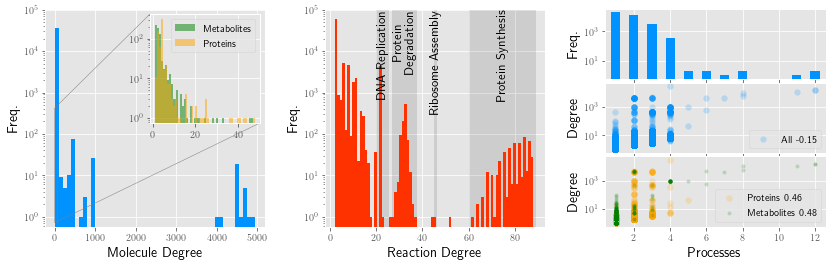

In [10]:
#graphs = [[('stodegree','m',node_colors[0],'Stoichiometric Degree',5000,[]),
#          ('instodegree','m',node_colors[0],'product degree',5000,[]),
#          ('outstodegree','m',node_colors[0],'reactant degree',5000,[])],
#          [('degree','r',node_colors[1],'degree reaction',0,[[60,89,"Protein Synthesis"],
#                                                             [27,37,"Protein\n Degradation"],
#                                                             [20,25,"DNA Replication"],
#                                                             [45,46,"Ribosome Assembly"]
#                                                            ]),
#          ('instodegree','r',node_colors[1],'reactant degree',0,[]),
#          ('outstodegree','r',node_colors[1],'product degree',0,[])]]

graphs = [('degree','m',node_colors[0],'Molecule Degree',5000,[]),
          ('degree','r',node_colors[1],'Reaction Degree',0,[[60,89,"Protein Synthesis"],
                                                             [27,37,"Protein\n Degradation"],
                                                             [20,25,"DNA Replication"],
                                                             [45,46,"Ribosome Assembly"]
                                                            ])]

fontsize = 14
fig =  plt.figure(constrained_layout=False,figsize=(14,4))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.27, hspace=0.05)

num_bins = 50
ax0 = fig.add_subplot(gs[:,0])
attr,tp,color,title,max_degree,annotations = graphs[0]
degrees = [m[attr] for n,m in g.nodes(data=True) if m['type']==tp and m[attr]>0 and m[attr]<=max_degree]
ax0.hist(degrees, num_bins,color= color)
ax0.set_yscale('log')
ax0.set_ylabel('Freq.',color="black",fontsize=fontsize)
ax0.set_xlabel(title,color="black",fontsize=fontsize)
#ax0.text(-0.1, -0.1, "a", transform=ax0.transAxes, 
#            size=18, weight='bold')

prot_degrees = [m['degree'] for _,m in g.nodes(data=True) if m['type']=='m' and m['moltype'] in ["Protein Monomer","Protein Complex"] and m['degree']<50]
met_degrees = [m['degree'] for _,m in g.nodes(data=True) if m['type']=='m' and m['moltype'] in ["Small Molecule"] and m['degree']<50]
num_bins = 50
in_ax = inset_axes(ax0, width="50%", height="50%", loc=1)
mark_inset(ax0, in_ax, loc1=2, loc2=4, fc="none", ec='0.5')
in_ax.set_yscale('log')

in_ax.hist(met_degrees, num_bins,alpha=0.5,label = "Metabolites",color="green")
in_ax.hist(prot_degrees, num_bins,alpha=0.5,label = "Proteins",color="orange")
in_ax.legend()

ax1 = fig.add_subplot(gs[:,1])
attr,tp,color,title,max_degree,annotations = graphs[1]
degrees = [m[attr] for n,m in g.nodes(data=True) if m['type']==tp and m[attr]>0]
for ann in annotations:
    ax1.axvspan(ann[0],ann[1], alpha=0.1, color='black')
    ax1.text(np.mean(ann[:-1]),1e5,ann[2],
verticalalignment='top', horizontalalignment='center',
color="black", fontsize=13,rotation=90)
num_bins = 80
ax1.hist(degrees, num_bins,color= color)
ax1.set_xlabel(title,color="black",fontsize=fontsize)
ax1.set_ylabel('Freq.',color="black",fontsize=fontsize)
ax1.set_yscale('log')
#ax1.set_yticklabels(['']*len(ax1.get_yticks()))
#ax1.text(-0.1, -0.1, "b", transform=ax1.transAxes, 
#            size=18, weight='bold')

ax0.set_ylim(ax1.get_ylim())


met_degree,met_process = zip(*met_degree_process)
prot_degree,prot_process = zip(*prot_degree_process)
degree,process = zip(*degree_process)

process_counter = Counter(mol_procs.values())
procs,val = zip(*process_counter.items())

ax02 = fig.add_subplot(gs[0,2])
ax02.set_yscale('log')
ax02.set_ylabel('Freq.',color="black",fontsize=fontsize)

ax02.bar(procs,val,width=0.5,label="All Molecules",color = node_colors[0])
#ax02.legend(loc="best")
ax02.set_xticklabels(['']*len(ax02.get_xticks()))
#ax02.text(-0.1, -0.1, "c", transform=ax02.transAxes, 
#            size=18, weight='bold')

ax12 = fig.add_subplot(gs[1,2])
ax12.scatter(process,degree, linewidth = 0.,s=40,alpha=0.2,label="All "+str(np.round(corr[0],2)),color = node_colors[0])
ax12.set_yscale('log')
ax12.set_ylabel('Degree',color="black",fontsize=fontsize)
ax12.legend(loc="best")
ax12.set_xticklabels(['']*len(ax12.get_xticks()))
#ax12.text(-0.1,-0.15, "d", transform=ax12.transAxes, 
#            size=18, weight='bold')

ax22 = fig.add_subplot(gs[2,2])
ax22.scatter(prot_process,prot_degree, linewidth = 0.,s=40,alpha=0.2,label="Proteins "+str(np.round(prot_corr[0],2)),color="orange")
ax22.scatter(met_process,met_degree, linewidth = 0.,s=15,alpha=0.2,label="Metabolites "+str(np.round(met_corr[0],2)),color="green")

#ax.set_xscale('log')
ax22.set_yscale('log')
ax22.set_xlabel('Processes',color="black",fontsize=fontsize)
ax22.set_ylabel('Degree',color="black",fontsize=fontsize)
ax22.legend(loc="best")
#ax22.text(-0.1, -0.3, "e", transform=ax22.transAxes, 
#            size=18, weight='bold')

ax02.set_xlim(ax22.get_xlim())


plt.tight_layout()

#
plt.savefig("topological_analysis.png",dpi=500, bbox_inches = 'tight',edgecolor='none')

# Moleculas em geral são mais consumidas do que produzidas, 
# reações por sua vez consomem mais do que produzem em números,
# celulas agregam e organizam moleculas menores

In [11]:
for node,data in g.nodes(data=True):
    if data['type'] == 'r' and data['degree'] == 2:
        mols = [key for key in g.predecessors(node)]+[key for key in g.successors(node)]
        degrees = [g.nodes[m]['degree'] for m in mols]
        if np.all(np.array(degrees)==2):
            print(node,list(zip(mols,degrees)))
            
essential = sorted([(node,g.nodes[node]['degree']) for node in g.nodes() if node in gene_essentiality.keys() and gene_essentiality[node]],key = lambda x:x[1])
non_essential = sorted([(node,g.nodes[node]['degree']) for node in g.nodes() if node in gene_essentiality.keys() and not gene_essentiality[node]],key = lambda x:x[1])

In [28]:
random_network_file = "randomized_essentiality_classification.dat"
data = []
with open(random_network_file) as f:
    for line in f.readlines():
        if line[0] == '#':
            continue
        data.append([float(val) for val in line.split('\t')])
data = np.array(data)
percentages = sorted(set(list(data[:,0])))
means = []
stds = []
maxs = []
mins = []
for p in percentages:
    subdata = data[data[:,0]==p]
    means.append(np.mean(subdata,axis=0))
    stds.append(np.std(subdata,axis=0))
    maxs.append(np.max(subdata,axis=0))
    mins.append(np.min(subdata,axis=0))
percentages = np.array(percentages)
means = np.array(means)
stds = np.array(stds)
maxs = np.array(maxs)
mins = np.array(mins)

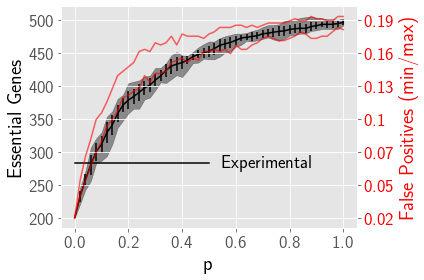

In [29]:
fontsize=20
fig, ax = plt.subplots(1,1,figsize=(6,4))

#essential_corr = scp.spearmanr(essential_path_len,essential_degree)
#non_essential_corr = scp.spearmanr(non_essential_path_len,non_essential_degree)

ax.fill_between(percentages, maxs[:,2],mins[:,2],alpha=0.4,color='black')
ax.errorbar(percentages,means[:,2],yerr=stds[:,2],color='black')
ax.plot([0,0.5],[283]*2,color='black')
ax.text(0.55,283, 'Experimental',verticalalignment='center', horizontalalignment='left',color='black', fontsize=fontsize-2)
ax.set_xlabel('p',fontsize=fontsize,color="black")
ax.set_ylabel('Essential Genes',fontsize=fontsize,color="black")
#axs[2].text(-0.1, -0.1, "c", transform=axs[2].transAxes, 
#            size=18, weight='bold')
ax.set_yticklabels(ax.get_yticks().astype(np.int32),size=fontsize-2)
ax.set_xticklabels(np.round(ax.get_xticks(),2),size=fontsize-2)

ax2 = ax.twinx()

#ax2.errorbar(percentages,means[:,4],yerr=stds[:,4],color='red',alpha=0.6 )
ax2.plot(percentages,maxs[:,4],color='red',alpha=0.6 )
ax2.plot(percentages,mins[:,4],color='red',alpha=0.6 )
#ax.set_xscale('log')
#ax.set_yscale('log')
ax2.set_ylabel('False Positives (min/max)',color='red',fontsize=fontsize)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yticks([ax2.get_ylim()[0]+(ax2.get_ylim()[1]-ax2.get_ylim()[0])*((t-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]))  for t in ax.get_yticks()][1:-1])
ax2.set_yticklabels(np.round(ax2.get_yticks(),2),size=fontsize-2)

fig.tight_layout()
plt.savefig("essentiality_analysis.png",dpi=500, bbox_inches = 'tight',edgecolor='none')

In [14]:
json_check = lambda x : json.loads(x) if (x != 'No degradation') else []

#print([m['degradationreaction'] for _,m in g.nodes(data=True) if m['type']=='m' and m['moltype'] in ["Protein Monomer","Protein Complex"] and m['degree']<50])

degree_diff = np.array([m['degree']-len(json_check(m['biosynthesisreaction']))-len(json_check(m['degradationreaction'])) for _,m in g.nodes(data=True) if m['type']=='m' and m['moltype'] in ["Protein Monomer","Protein Complex"]])

no_function_proteins = np.array([m['usualname'] for _,m in g.nodes(data=True) if m['type']=='m' and m['moltype'] in ["Protein Monomer","Protein Complex"] and m['degree']-len(json_check(m['biosynthesisreaction']))-len(json_check(m['degradationreaction']))==0])

print("No function proteins",1-(np.count_nonzero(degree_diff)/degree_diff.size),"%")
print(len(no_function_proteins))
print(sorted(no_function_proteins))
        

No function proteins 0.20147058823529407 %
137
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '116 kDa surface antigen', '23S rRNA pseudouridine synthase; U1911, U1915, U1917', '23S rRNA pseudouridine synthase; U955, U2504, U2580', 'ATP-dependent RNA helicase', 'Beta-glycosyl transferase', 'Cof-like hydrolase', 'Cof-like hydrolase, putative', 'DHH family protein', 'DNA primase-related protein', 'DnaJ domain protein', 'DnaJ domain protein', 'GTP-binding protein YchF', 'HD domain protein', 'ImpB/MucB/SamB family protein', 'MgPa adhesin', 'P200 protein', 'P65 adhesin', 'Putative metalloprotease', 'Putative phosphotransferase enzyme glucose-specific IIB component', 'Replication initiation/membrane attachment protein', 'S-adenosyl-methyltransferase MraW', 'SNF2 family helicase putative', 